In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv('data/activity_data.csv')
print(len(df))

52


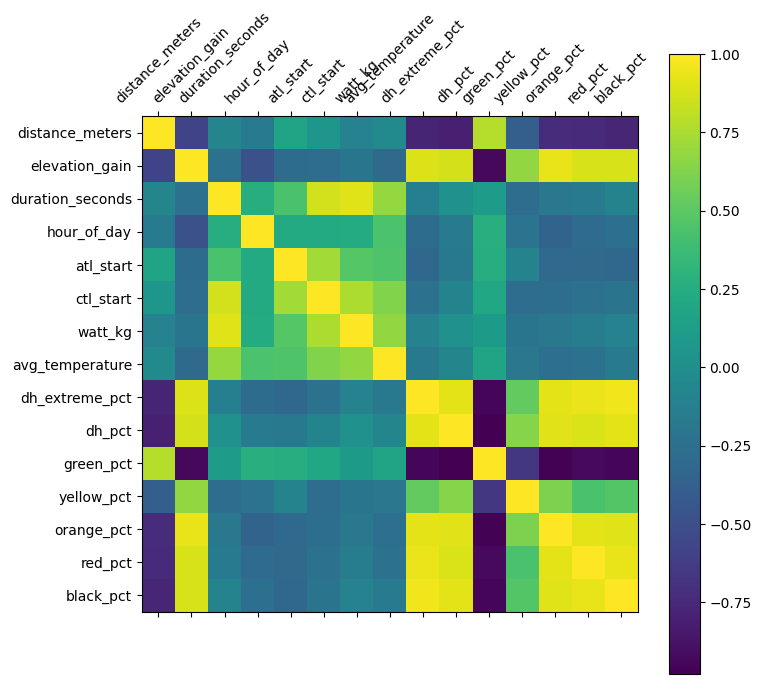

In [41]:
plots_path = 'plots/'
if not os.path.exists(plots_path):
    os.makedirs(plots_path)

# Remove cols activity_id, date

df = df.drop(columns=['activity_id', 'date'])

fig = plt.figure(figsize=(8, 8))

corr = df.corr()
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.savefig(plots_path + 'correlation_matrix.png')
plt.show()


In [42]:
# Train linear regressor, ridge regressor, lasso regressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

pred_feature = "duration_seconds"
X = df.drop(columns=[pred_feature])
y = df[pred_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)
y_pred_ridge = ridge_regressor.predict(X_test)

lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)
y_pred_lasso = lasso_regressor.predict(X_test)

r2_linear = r2_score(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("linear, ridge, lasso")
print(r2_linear, r2_ridge, r2_lasso)



linear, ridge, lasso
0.7831836880291899 0.9296627791407341 0.7832147601982403


c:\Users\Fco\miniconda3\envs\mtb\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+11, tolerance: 5.779e+10
  model = cd_fast.enet_coordinate_descent(


In [43]:
# Apply dimensionality reduction using PCA

variance = [
    0.90,
    0.95,
    0.99
]

from sklearn.decomposition import PCA

print("Data features: ", X_train.shape[1])

for v in variance:
    pca = PCA(n_components=v)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    ridge_regressor = Ridge()
    ridge_regressor.fit(X_train_pca, y_train)
    y_pred_ridge = ridge_regressor.predict(X_test_pca)

    r2_ridge = r2_score(y_test, y_pred_ridge)

    print("-"*10)
    print("PCA variance: ", v)
    print("PCA components: ", pca.n_components_)
    print("Ridge R2: ", r2_ridge)

Data features:  14
----------
PCA variance:  0.9
PCA components:  5
Ridge R2:  0.8885520669287873
----------
PCA variance:  0.95
PCA components:  6
Ridge R2:  0.9092036977176345
----------
PCA variance:  0.99
PCA components:  10
Ridge R2:  0.9487617537194336


: 